11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8645 - loss: 0.4829 - val_accuracy: 0.9563 - val_loss: 0.1528
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9595 - loss: 0.1361 - val_accuracy: 0.9670 - val_loss: 0.1167
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9760 - loss: 0.0816 - val_accuracy: 0.9684 - val_loss: 0.1018
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9827 - loss: 0.0593 - val_accuracy: 0.9725 - val_loss: 0.0947
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9867 - loss: 0.0458 - val_accuracy: 0.9745 - val_loss: 0.0828
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0848
Test accuracy: 0.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


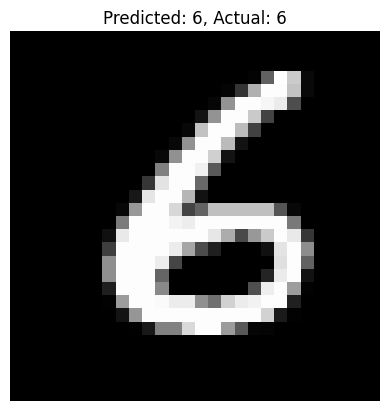

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f'Test accuracy: {test_acc:.2f}')

# Pick a random sample from the test set
index = np.random.randint(0, len(x_test))
sample_image = x_test[index]
sample_label = y_test[index]

# Predict the digit
prediction = model.predict(sample_image.reshape(1, 28, 28))
predicted_class = np.argmax(prediction)

# Show the image and prediction
plt.imshow(sample_image, cmap='gray')
plt.title(f"Predicted: {predicted_class}, Actual: {sample_label}")
plt.axis('off')
plt.show()
